# **_Comparing MEAN vs. MEDIAN Relationships between Distributions with:_**

## **_1. Small vs. Large Outliers_**

## **_2. Small vs. Large Dataset Sizes_**

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

This Python Jupyter notebook consists of my solution to an exercise from the Data Visualization section of Mike X. Cohen's Statistics & Machine Learning course on Udemy.

-   Udemy course: https://www.udemy.com/course/statsml_x

-   Professor Cohen's website: https://www.mikexcohen.com/

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Instructions:_**

Compare the mean and median in two pairs of distributions...

Compare for distributions with:

#### **_First Pair of Distributions: Outliers_**

-   Put outliers into the data.

-   **Outlier:** An unusually large or small value in a dataset.

-   How is the **MEAN vs. MEDIAN** relationship affected for these two different differences of outliers.

1.  "Small" outliers

    -   **Small** means not really far from the distribution -- doesn't mean _tiny_.

    -   Small outliers can be negative, to the left of the distribution.

2.  "Large" outliers

    -   Data points that are really far away from the main part of the dataset.

    -   For dataset with max(14), large outlier might be 10000, 100000000...

#### **_Second Pair of Distrubtions: Dataset Size_**

1. Small-$N$ datasets

    -   $\sim 10\text{-}50$ data points.

2. Large-$N$ datasets

    -   $\sim 100\text{-}1000$ data points.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

## **_Conclusion:_**

-   The difference between MEAN and MEDIAN for normal distributions, based on small and large outliers, **IS** statistically relevant.

-   The difference between MEAN and MEDIAN for normal distributions, based on small and large dataset sizes, **IS NOT** statistically relevant.

-   Statistical relevance is based on whether the difference is less than or greater than one order of magnitude.

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">

### **_Part 1._**

## **_Datasets with SMALL/LARGE Outliers:_**

#### **_Imports:_**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### **_General Parameters:_**

-   `outl` in variable names signifies distributions are based on differences in _outliers_.

-   `ds` means _dataset_.

In [2]:
# Number of points in datasets:
outl_ds_n = 2500
# Dataset percentage of outliers (`outl`):
outl_pct = 1
# Formula to convert outlier percentage:
outl_n = int(outl_pct / 100 * outl_ds_n)
# Number of bins
outl_bin_n = 100

# Small outliers shift:
outl_sm_shift = 10
# Large outliers shift:
outl_lg_shift = 1000

# Orders of magnitude to use as comparison:
ord_mag_metric = 1

#### **_Generate Datasets for SMALL and LARGE Outliers:_**

In [3]:
# Generate datasets to combine with outliers...
outl_sm_ds = np.random.randn(outl_ds_n)  # Small outliers
outl_lg_ds = np.random.randn(outl_ds_n)  # Large outliers

# Create outlier data:
outl_sm = np.random.randn(outl_n) + outl_sm_shift  # Small outliers
outl_lg = np.random.randn(outl_n) + outl_lg_shift  # Large outliers

# Fold outliers into main datasets:
outl_sm_ds = np.hstack((outl_sm_ds, outl_sm))  # Small outliers
outl_lg_ds = np.hstack((outl_lg_ds, outl_lg))  # Large outliers

#### **_Generate Histogram Data as Proportion:_**

In [4]:
# Extract histogram y and x:
outl_sm_y, outl_sm_x = np.histogram(outl_sm_ds, bins=outl_bin_n)  # Small outliers
outl_lg_y, outl_lg_x = np.histogram(outl_lg_ds, bins=outl_bin_n)  # Large outliers

# Identify bin centers:
outl_sm_x = (outl_sm_x[1:] + outl_sm_x[:-1]) / 2  # Small outliers
outl_lg_x = (outl_lg_x[1:] + outl_lg_x[:-1]) / 2  # Large outliers

# Convert data to proportion:
outl_sm_y_prop = 100 * outl_sm_y / sum(outl_sm_y)  # Small outliers
outl_lg_y_prop = 100 * outl_lg_y / sum(outl_lg_y)  # Large outliers

#### **_Calculate Central Tendencies:_**

In [5]:
# Get means:
outl_sm_mean = np.mean(outl_sm_ds)  # Small outliers
outl_lg_mean = np.mean(outl_lg_ds)  # Large outliers

# Get medians:
outl_sm_med = np.median(outl_sm_ds)  # Small outliers
outl_lg_med = np.median(outl_lg_ds)  # Large outliers

# Compute difference between central tendencies (`ct`):
outl_sm_ct_diff = abs(outl_sm_mean - outl_sm_med)
outl_lg_ct_diff = abs(outl_lg_mean - outl_lg_med)

#### **_Create Analysis String:_**

In [6]:
# Analyze relevance of difference:
outl_ct_num = max([outl_sm_ct_diff, outl_lg_ct_diff])
outl_ct_denom = min([outl_sm_ct_diff, outl_lg_ct_diff])
outl_ct_ratio = outl_ct_num / outl_ct_denom
outl_ct_bool = bool(outl_ct_ratio > 10**ord_mag_metric)
outl_ct_not = [" NOT ", " "][outl_ct_bool]
outl_ct_less = [" LESS ", " MORE "][outl_ct_bool]
outl_ct_analysis = "ANALYSIS: Difference between internal\n"
outl_ct_analysis += "MEAN vs. MEDIAN relationships in\n"
outl_ct_analysis += "SMALL-OUTLIER vs. LARGE-OUTLIER datasets\n"
outl_ct_analysis += f"is{outl_ct_less}than {ord_mag_metric} order of magnitude,\n"
outl_ct_analysis += f"therefore IS{outl_ct_not}statistically important."

#### **_Calculate Axes Limits for Zooming Plots:_**

In [7]:
# Visualize more distinctly difference between mean and med:
outl_sm_min_lim = min(outl_sm_med, outl_sm_mean) - outl_sm_shift / 7.5
outl_sm_max_lim = max(outl_sm_med, outl_sm_mean) + outl_sm_shift / 7.5

# Visualize more distinctly difference between mean and med:
outl_lg_min_lim = min(outl_lg_med, outl_lg_mean) - outl_lg_shift / 400
outl_lg_max_lim = max(outl_lg_med, outl_lg_mean) + outl_lg_shift / 50

#### **_Pause Visualization:_**

In [8]:
%matplotlib agg

#### **_Create SMALL Line-Histogram Plot and Specifications:_**

In [9]:
# Plot small outliers distribution...
fig, ax = plt.subplots(2, 2, figsize=(15, 14))

ax[0][0].plot(outl_sm_x, outl_sm_y_prop, label="Line-Histogram",
              c='lightsalmon', linewidth=2.5)

# Name max for multiple usage:
sm_max_y = max(outl_sm_y_prop)

# Plot small outliers mean:
ax[0][0].plot([outl_sm_mean, outl_sm_mean], [0, sm_max_y / 2], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(outl_sm_mean, 3)}")

# Plot small outliers median:
ax[0][0].plot([outl_sm_med, outl_sm_med], [sm_max_y / 2, sm_max_y], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(outl_sm_med, 3)}")


ax[0][0].set_xlim([outl_sm_min_lim, outl_sm_max_lim])
ax[0][0].grid(alpha=.5)

# Labels, legend, title:
ax[0][0].set_xlabel("Data Values")
ax[0][0].set_ylabel("Data Counts: Proportion")
ax[0][0].legend()
ax[0][0].set_title("SMALL-OUTLIERS Line-Histogram (values-axis zoomed)",
                   fontweight='bold')


# Annotating the difference between mean and median:
ax[0][0].annotate(f"Offset: {outl_sm_ct_diff:.3f}",
                #   xy=(outl_sm_med, sm_max_y),
                  xy=(outl_sm_med + outl_sm_ct_diff * .2, sm_max_y),
                  xytext=(outl_sm_mean, sm_max_y / 2),
                  arrowprops=dict(facecolor='black', arrowstyle="->"),
                  fontsize=12, color='black')

Text(0.10301870777679527, 3.3465346534653464, 'Offset: 0.083')

#### **_Create LARGE Line-Histogram Plot and Specifications:_**

In [10]:
# Plot large outliers distribution...
ax[0][1].plot(outl_lg_x, outl_lg_y_prop, label="Line-Histogram",
              c='lightsalmon', linewidth=2.5)

# Repeated in CT plotting:
lg_max_y = max(outl_lg_y_prop)

# Plot large outliers mean:
ax[0][1].plot([outl_lg_mean, outl_lg_mean], [0, lg_max_y / 2], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(outl_lg_mean, 3):,.3f}")

# Plot large outliers median:
ax[0][1].plot([outl_lg_med, outl_lg_med], [lg_max_y / 2, lg_max_y], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(outl_lg_med, 3)}")


ax[0][1].set_xlim([outl_lg_min_lim, outl_lg_max_lim])
ax[0][1].grid(alpha=.5)

# Labels, legend, title:
ax[0][1].set_xlabel("Data Values")
ax[0][1].set_ylabel("Data Counts: Proportion")
ax[0][1].legend()
ax[0][1].set_title("LARGE-OUTLIERS Line-Histogram (values-axis zoomed)",
                   fontweight='bold')

# Annotating the difference between mean and median:
ax[0][1].annotate(f"Offset: {outl_lg_ct_diff:.3f}",
                  xy=(outl_lg_med + outl_lg_ct_diff * .01, lg_max_y),
                  xytext=(outl_lg_mean, lg_max_y / 2),
                  arrowprops=dict(facecolor='black', arrowstyle="->"),
                  fontsize=12, color='black')

ax[0][1].annotate("(MEDIAN Offset due to Num Bins vs.\nOutlier Distance from Main Data Cluster)",
                  xy=(outl_lg_x[0], max(outl_lg_y_prop)),
                  xytext=(outl_lg_med + outl_lg_shift / 100, lg_max_y * .85),
                  arrowprops=dict(facecolor='black', arrowstyle="->"),
                  fontsize=12, fontstyle='oblique', color='black')

Text(10.030618390560457, 84.15841584158416, '(MEDIAN Offset due to Num Bins vs.\nOutlier Distance from Main Data Cluster)')

#### **_Create SMALL Data Points Plot and Specifications:_**

In [11]:
# Plot small outliers distribution...
ax[1][0].plot(outl_sm_ds, '.', c='lightsalmon', alpha=.45, label="Datum")

# Plot small outliers mean:
ax[1][0].plot([0, outl_ds_n / 2], [outl_sm_mean, outl_sm_mean], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(outl_sm_mean, 3)}")

# Plot small outliers median:
ax[1][0].plot([outl_ds_n / 2, outl_ds_n], [outl_sm_med, outl_sm_med], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(outl_sm_med, 3)}")

ax[1][0].grid(alpha=.5)

# Labels, legend, title:
ax[1][0].set_xlabel("Data Points")
ax[1][0].set_ylabel("Data Values")
ax[1][0].legend()
ax[1][0].set_title(f"SMALL-OUTLIERS Data Dispersion (values-axis to scale)", fontweight='bold')

Text(0.5, 1.0, 'SMALL-OUTLIERS Data Dispersion (values-axis to scale)')

#### **_Create LARGE Data Points Plot and Specifications:_**

In [12]:
# Plot large outliers distribution...
ax[1][1].plot(outl_lg_ds, '.', c='lightsalmon', alpha=.45, label="Datum")

# Plot large outliers mean:
ax[1][1].plot([0, outl_ds_n / 2], [outl_lg_mean, outl_lg_mean], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(outl_lg_mean, 3):,.3f}")

# Plot large outliers median:
ax[1][1].plot([outl_ds_n / 2, outl_ds_n], [outl_lg_med, outl_lg_med], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(outl_lg_med, 3)}")

ax[1][1].grid(alpha=.5)

# Labels, legend, title:
ax[1][1].set_xlabel("Data Points")
ax[1][1].set_ylabel("Data Values")
ax[1][1].legend()
ax[1][1].set_title(f"LARGE-OUTLIERS Data Dispersion (values-axis to scale)", fontweight='bold')

Text(0.5, 1.0, 'LARGE-OUTLIERS Data Dispersion (values-axis to scale)')

#### **_Compile Main Figure Title:_**

In [13]:
# Figure title:
outl_sup_title = "HISTOGRAMS/DATA-VALUES Plots: MEAN vs. MEDIAN Relationships\n"
outl_sup_title += "in Normal Distributions for\n"
outl_sup_title += f"SMALL-OUTLIERS Dataset (+{outl_sm_shift:.1f} Shift) vs. "
outl_sup_title += f"LARGE-OUTLIERS Dataset (+{outl_lg_shift:,} Shift)\n"
outl_sup_title += f"Data Pts: {outl_ds_n}  |  {outl_pct}% Outliers\n\n"
outl_sup_title += f"$\\frac{{MEANvs.MEDIANdifference(SMALL)}}{{MEANvs.MEDIANdifference(LARGE)}}$ "
outl_sup_title += "$\\Rightarrow$ $\\frac{%.3f}{%.3f}$\n" % (np.round(outl_sm_ct_diff, 3),
                                                             np.round(outl_lg_ct_diff, 3))

#### **_Un-Pause Visualization:_**

In [14]:
# Re-activate visualization capability:
%matplotlib inline

#### **_Show OUTLIER-based Figure:_**

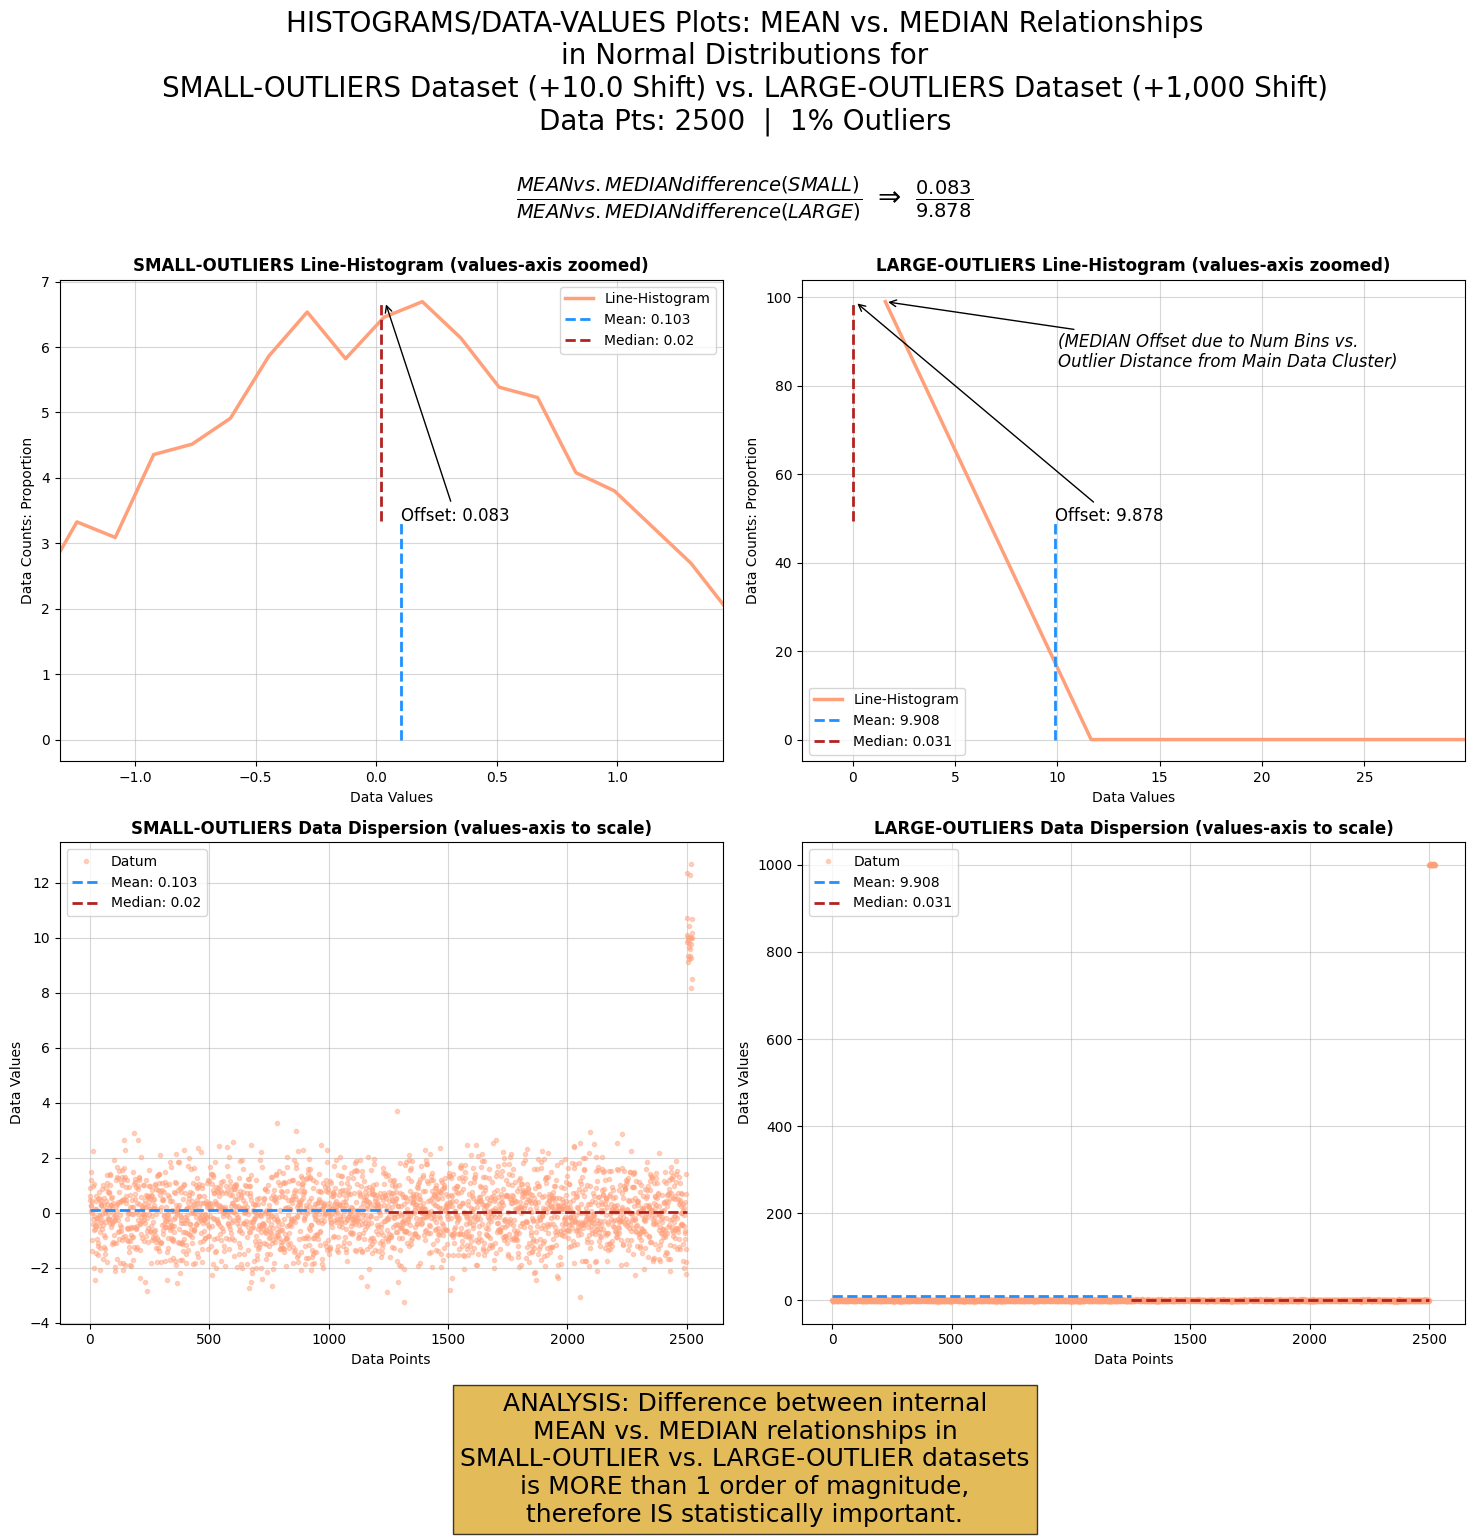

In [15]:
fig.suptitle(outl_sup_title, size=20)
plt.figtext(0.5, -0.1, outl_ct_analysis, ha="center", fontsize=18, bbox={"facecolor": "goldenrod", "alpha": 0.75, "pad": 5})
plt.tight_layout()

plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px dodgerblue; width: 85%;">

### **_Part 2._**

## **_Datasets with SMALL/LARGE Sizes:_**

#### **_Imports:_**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### **_General Parameters:_**

-   `size` in variable names signifies distributions are based on differences in _dataset sizes_.

In [17]:
# Dataset sizes:
size_sm_ds_n = 50
size_lg_ds_n = 1000

# Bin sizes:
size_sm_bin_n = size_sm_ds_n // 7
size_lg_bin_n = size_lg_ds_n // 50

#### **_Generate Datasets with SMALL/LARGE Sizes:_**

In [18]:
size_sm_ds = np.random.randn(size_sm_ds_n)  # Small size
size_lg_ds = np.random.randn(size_lg_ds_n)  # Large size

#### **_Generate Histogram Data as Proportion:_**

In [19]:
# Extract histogram y and x:
size_sm_y, size_sm_x = np.histogram(size_sm_ds, bins=size_sm_bin_n)  # Small size
size_lg_y, size_lg_x = np.histogram(size_lg_ds, bins=size_lg_bin_n)  # Large size

# Identify bin centers:
size_sm_x = (size_sm_x[1:] + size_sm_x[:-1]) / 2  # Small size
size_lg_x = (size_lg_x[1:] + size_lg_x[:-1]) / 2  # Large size

# Convert data to proportion:
size_sm_y_prop = 100 * size_sm_y / sum(size_sm_y)  # Small size
size_lg_y_prop = 100 * size_lg_y / sum(size_lg_y)  # Large size

#### **_Calculate Central Tendencies:_**

In [20]:
# Get means:
size_sm_mean = np.mean(size_sm_ds)  # Small size
size_lg_mean = np.mean(size_lg_ds)  # Large size

# Get medians:
size_sm_med = np.median(size_sm_ds)  # Small size
size_lg_med = np.median(size_lg_ds)  # Large size

# Compute difference between central tendencies (`ct`):
size_sm_ct_diff = abs(size_sm_mean - size_sm_med)
size_lg_ct_diff = abs(size_lg_mean - size_lg_med)

#### **_Create Analysis String:_**

In [21]:
# Analyze relevance of difference:
size_ct_num = max([size_sm_ct_diff, size_lg_ct_diff])
size_ct_denom = min([size_sm_ct_diff, size_lg_ct_diff])
size_ct_ratio = size_ct_num / size_ct_denom
size_ct_bool = bool(size_ct_ratio > 10**ord_mag_metric)
size_ct_parity = [" NOT ", " "][size_ct_bool]
size_ct_less = [" LESS ", " MORE "][size_ct_bool]
size_ct_analysis = "ANALYSIS: Difference between internal\n"
size_ct_analysis += "MEAN vs. MEDIAN relationships in\n"
size_ct_analysis += "SMALL-SIZE vs. LARGE-SIZE datasets\n"
size_ct_analysis += f"is{size_ct_less}than {ord_mag_metric} order of magnitude,\n"
size_ct_analysis += f"therefore IS{size_ct_parity}statistically important."

#### **_Calculate Axes Limits for Zooming Plots:_**

In [22]:
# Visualize more distinctly difference between mean and med:
size_sm_min_lim = min(size_sm_med, size_sm_mean)
size_sm_max_lim = max(size_sm_med, size_sm_mean)

# Visualize more distinctly difference between mean and med:
size_lg_min_lim = min(size_lg_med, size_lg_mean)
size_lg_max_lim = max(size_lg_med, size_lg_mean)

#### **_Pause Visualization:_**

In [23]:
%matplotlib agg

#### **_Create SMALL Line-Histogram Plot and Specifications:_**

In [24]:
# Plot small outliers distribution...
fig, ax = plt.subplots(2, 2, figsize=(15, 14))

ax[0][0].plot(size_sm_x, size_sm_y_prop, label="Line-Histogram",
              c='lightsalmon', linewidth=2.5)

# Name max for multiple usage:
sm_max_y = max(size_sm_y_prop)

# Plot small outliers mean:
ax[0][0].plot([size_sm_mean, size_sm_mean], [0, sm_max_y / 2], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(size_sm_mean, 3)}")

# Plot small outliers median:
ax[0][0].plot([size_sm_med, size_sm_med], [sm_max_y / 2, sm_max_y], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(size_sm_med, 3)}")


# ax[0][0].set_xlim([size_sm_min_lim, size_sm_max_lim])
ax[0][0].grid(alpha=.5)

# Labels, legend, title:
ax[0][0].set_xlabel("Data Values")
ax[0][0].set_ylabel("Data Counts: Proportion")
ax[0][0].legend()
ax[0][0].set_title("SMALL-SIZE Line-Histogram",
                   fontweight='bold')


# Annotating the difference between mean and median:
ax[0][0].annotate(f"Offset: {size_sm_ct_diff:.3f}",
                #   xy=(size_sm_med, sm_max_y),
                  xy=(size_sm_med + size_sm_ct_diff * .2, sm_max_y),
                  xytext=(size_sm_mean, sm_max_y / 2),
                  arrowprops=dict(facecolor='black', arrowstyle="->"),
                  fontsize=12, color='black')

Text(-0.015805301634543995, 13.0, 'Offset: 0.078')

#### **_Create LARGE Line-Histogram Plot and Specifications:_**

In [25]:
# Plot large outliers distribution...
ax[0][1].plot(size_lg_x, size_lg_y_prop, label="Line-Histogram",
              c='lightsalmon', linewidth=2.5)

# Repeated in CT plotting:
lg_max_y = max(size_lg_y_prop)

# Plot large outliers mean:
ax[0][1].plot([size_lg_mean, size_lg_mean], [0, lg_max_y / 2], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(size_lg_mean, 3):,.3f}")

# Plot large outliers median:
ax[0][1].plot([size_lg_med, size_lg_med], [lg_max_y / 2, lg_max_y], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(size_lg_med, 3)}")


# ax[0][1].set_xlim([size_lg_min_lim, size_lg_max_lim])
ax[0][1].grid(alpha=.5)

# Labels, legend, title:
ax[0][1].set_xlabel("Data Values")
ax[0][1].set_ylabel("Data Counts: Proportion")
ax[0][1].legend()
ax[0][1].set_title("LARGE-SIZE Line-Histogram",
                   fontweight='bold')

# Annotating the difference between mean and median:
ax[0][1].annotate(f"Offset: {size_lg_ct_diff:.3f}",
                  xy=(size_lg_med + size_lg_ct_diff * .01, lg_max_y),
                  xytext=(size_lg_mean, lg_max_y / 2),
                  arrowprops=dict(facecolor='black', arrowstyle="->"),
                  fontsize=12, color='black')

Text(-0.010051940282140624, 8.05, 'Offset: 0.032')

#### **_Create SMALL Data Points Plot and Specifications:_**

In [26]:
# Plot small outliers distribution...
ax[1][0].plot(size_sm_ds, '.', c='lightsalmon', alpha=.45, label="Datum")

# Plot small outliers mean:
ax[1][0].plot([0, size_sm_ds_n / 2], [size_sm_mean, size_sm_mean], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(size_sm_mean, 3)}")

# Plot small outliers median:
ax[1][0].plot([size_sm_ds_n / 2, size_sm_ds_n], [size_sm_med, size_sm_med], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(size_sm_med, 3)}")

ax[1][0].grid(alpha=.5)

# Labels, legend, title:
ax[1][0].set_xlabel("Data Points")
ax[1][0].set_ylabel("Data Values")
ax[1][0].legend()
ax[1][0].set_title(f"SMALL-SIZE Data Dispersion", fontweight='bold')

Text(0.5, 1.0, 'SMALL-SIZE Data Dispersion')

#### **_Create LARGE Data Points Plot and Specifications:_**

In [27]:
# Plot large outliers distribution...
ax[1][1].plot(size_lg_ds, '.', c='lightsalmon', alpha=.45, label="Datum")

# Plot large outliers mean:
ax[1][1].plot([0, size_lg_ds_n / 2], [size_lg_mean, size_lg_mean], '--', c='dodgerblue',
              lw=2, label=f"Mean: {np.round(size_lg_mean, 3):,.3f}")

# Plot large outliers median:
ax[1][1].plot([size_lg_ds_n / 2, size_lg_ds_n], [size_lg_med, size_lg_med], '--', c='firebrick',
              lw=2, label=f"Median: {np.round(size_lg_med, 3)}")

ax[1][1].grid(alpha=.5)

# Labels, legend, title:
ax[1][1].set_xlabel("Data Points")
ax[1][1].set_ylabel("Data Values")
ax[1][1].legend()
ax[1][1].set_title(f"LARGE-SIZE Data Dispersion", fontweight='bold')

Text(0.5, 1.0, 'LARGE-SIZE Data Dispersion')

#### **_Compile Main Figure Title:_**

In [28]:
# Figure title:
size_sup_title = "HISTOGRAMS/DATA-VALUES Plots: MEAN vs. MEDIAN Relationships\n"
size_sup_title += "in Normal Distributions for\n"
size_sup_title += f"SMALL-SIZE Dataset ({size_sm_ds_n} points) vs. "
size_sup_title += f"LARGE-SIZE Dataset ({size_lg_ds_n:,} points)\n\n"
size_sup_title += f"$\\frac{{MEANvs.MEDIANdifference(SMALL)}}{{MEANvs.MEDIANdifference(LARGE)}}$ "
size_sup_title += "$\\Rightarrow$ $\\frac{%.3f}{%.3f}$\n\n" % (np.round(size_sm_ct_diff, 3),
                                                        np.round(size_lg_ct_diff, 3))

fig.suptitle(size_sup_title, size=20)
plt.figtext(0.5, -0.1, size_ct_analysis, ha="center", fontsize=18, bbox={"facecolor": "goldenrod", "alpha": 0.75, "pad": 5})
plt.tight_layout()

#### **_Un-Pause Visualization:_**

In [29]:
# Re-activate visualization capability:
%matplotlib inline

#### **_Show SIZE-based Figure:_**

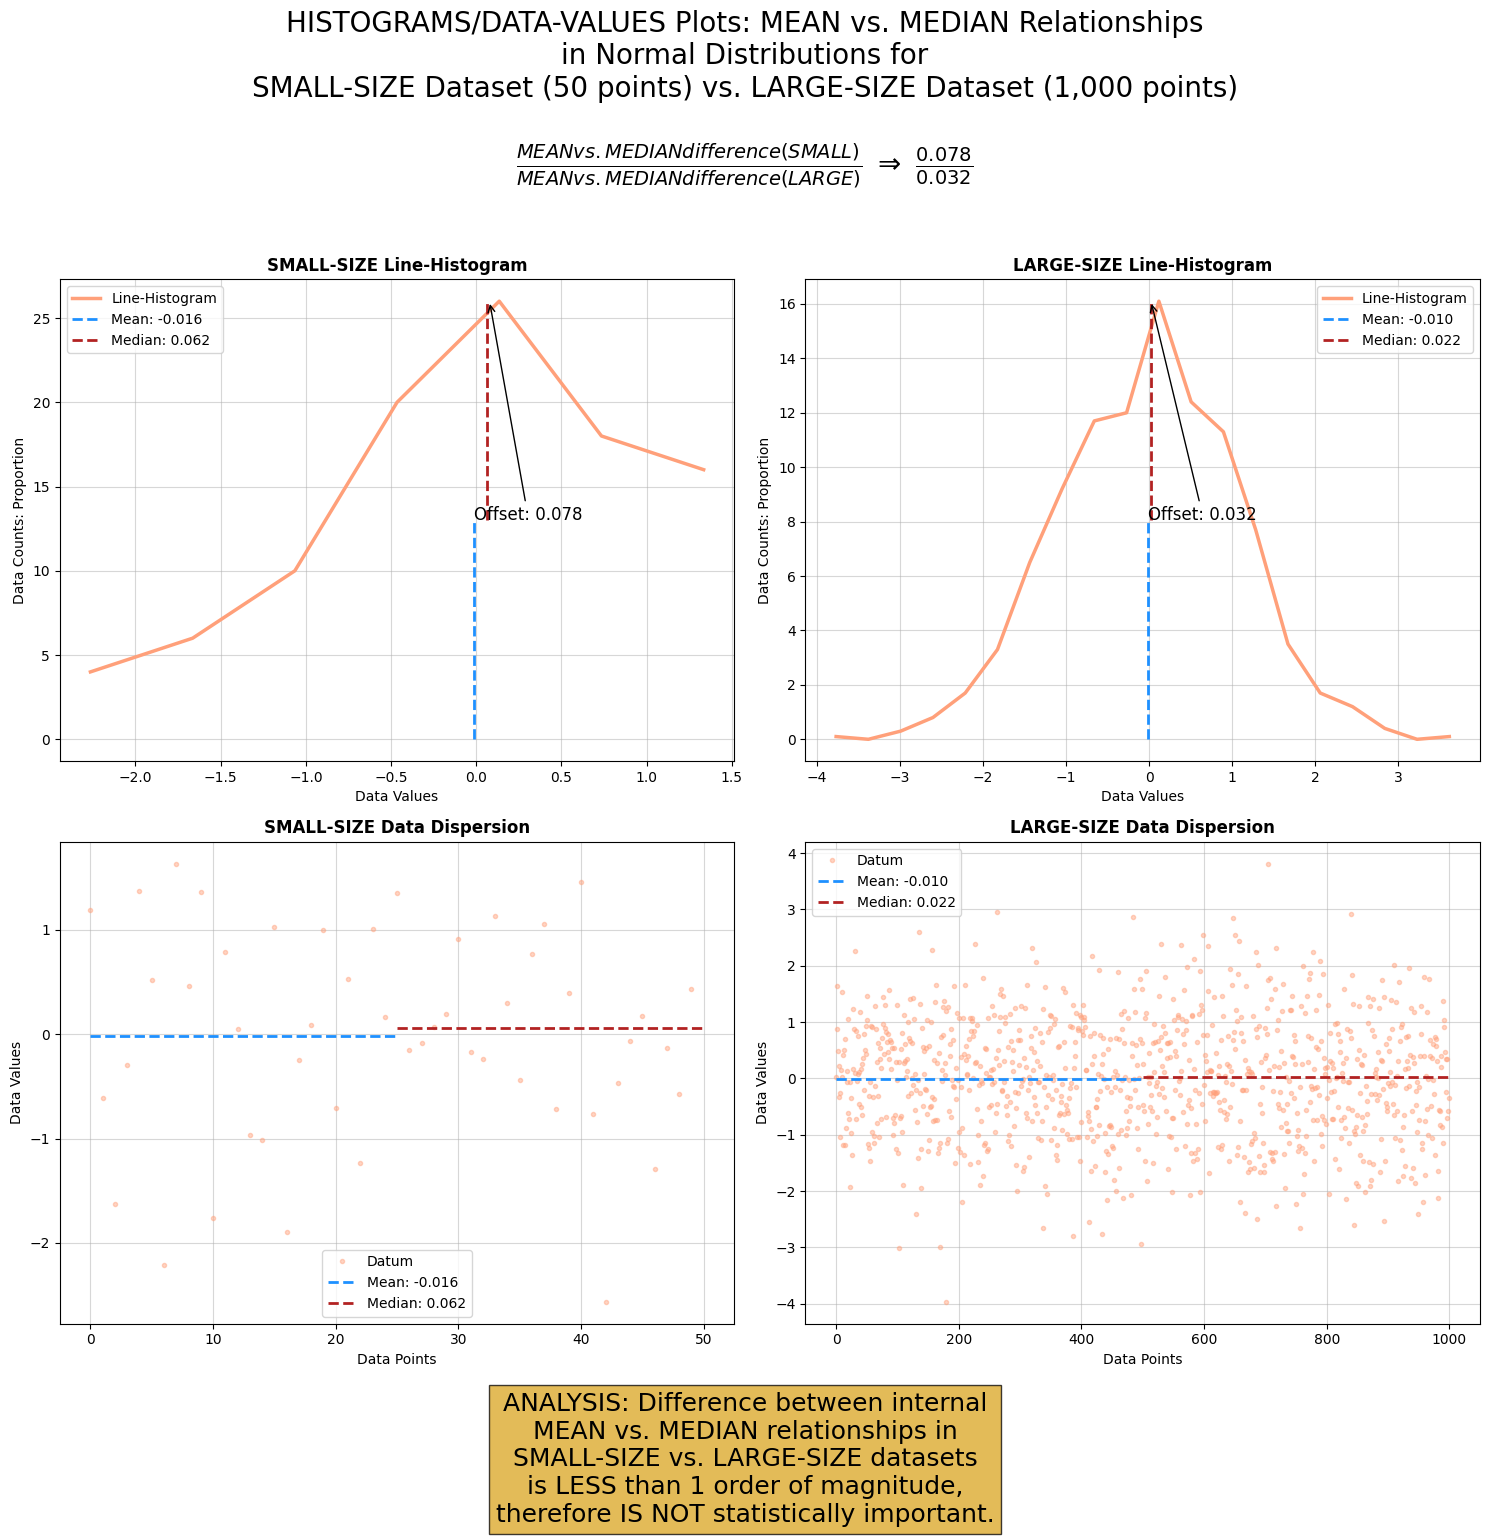

In [30]:
plt.show()

<hr style="height: 0; box-shadow: 0 0 5px 4px crimson; width: 95%;">